### 4-7 Q&A

1. 如果训练集具有数百万个特征，那么可以使用哪种线性回归训练算法？

此时可是使用随机梯度下降或者小批量梯度下降。如果内存可以容纳训练集的话，也可以使用批量梯度下降。但是不能使用“闭式”方程的标准方程求解算法或者SVD(奇异值分解)算法，这是因为随着特征数量的的增加，计算复杂度急剧增加. 标准方程算法的计算时间复杂度为$\large O (n^{2.4})$到$\large O (n^{3})$之间， Scikit-Learn的计算时间复杂度为$\large O ( n^2)$

2. 如果训练集里特征的数值大小迥异，哪种算法可能会受到影响？受影响程度如何？你应该怎么做？

如果训练集中的特征的数值大小迥异，会造成loss函数是一个细长的碗形，梯度下降需要更多很长的时间才能收敛。为了解决这个问题，应该在训练模型前缩放数据。不过，标准方程和SVD算法是不用进行数据缩放的。

此外如果没有对数据按比例缩放的话，也会造成正则化收敛到次优解：由于正则化会惩罚较大的权重，所以与较大的特征值相比，较小的特征值往往容易被忽略。


3. 训练逻辑回归模型时，梯度下降会卡在局部最小值中吗？

不会，因为逻辑回归模型的loss函数是一个凸函数

4. 如果你让它们运行足够长的时间，是否所有的梯度下降算法都能得出相同的模型？

如果优化的问题是凸的(比如线性回归和逻辑回归)的问题，假设学习率又不大，经过长时间的学习所有的梯度下降算法都可以接近全局最优解，最终得出的相似的模型。

但是除非逐步降低学习率，否则随机梯度下降和小批量梯度下降永远不会真正收敛。相反，他们会一直围绕着全局最优解的周围跳来跳去，即使你运行很长的时间，这些梯度算法产生的模型也是略微不同的。

5. 假设你使用批量梯度下降，并在每个轮次绘制验证误差。如果你发现验证错误持续上升，可能是什么情况？你该如何解决？

如果验证错误在每个轮次后持续上升，有一种可能性是学习速率过大并且算法也在发散。如果，训练误差也在上升，那么显然是问题所在了，你应该降低学习速率。如果训练误差没有增加，则模型已经过拟合了，你应该提前停止训练。


6. 当验证错误上升时立即停止小批量梯度下降是个好主意吗？

由于随机性，随机梯度下降和小批量梯度下降并不能保证每次的训练都有进展，如果在验证错误上升是立即停止训练，有可能在达到最优解的之前就停止了训练。对于小批量梯度下降和随机梯度下降更好的选择是按照一定的时间间隔保存模型，如果模型在很长的时间内没有得到改善（你可以认为此时已经找到了最优解），你可以恢复到以前保存的最佳模型。

7. 哪种梯度下降算法（本章讨论过的）能最快到达最优解的附近？哪种会收敛？如何使其他算法同样收敛？

随机梯度下降具有最快的训练迭代速度，因为它一次只考虑一个训练实例，因此它通常是第一个到达全局最优解附近的（或是很小批量大小的小批量梯度下降）。但是，给到足够的训练时间，实际上只有批量梯度下降会收敛。如前所述，随机梯度下降和小批量梯度下降会在最优解附近反弹，除非你逐渐降低学习率。

8. 假设你使用的是多项式回归，绘制出学习曲线，你发现训练误差和验证误差之间存在很大的差距。发生了什么？哪三种方法可以解决这个问题？

如果验证误差远高于训练误差，则可能是因为模型过拟合了训练集。解决此问题的一种方法是降低多项式阶数：较小自由度的模型不太可能过拟合。另外一种方法是对模型进行正则化，例如，将$l_2$Ridge或$l_1$(Lasso)惩罚添加到成本函数。这也会降低模型的自由度。最后，你可以尝试增加训练集的大小。



9. 假设你使用的是岭回归，你注意到训练误差和验证误差几乎相等,并且非常高。你认为模型是高方差还是高偏差？你应该提高还是降低正则化超参数$\alpha$?

如果训练误差和验证误差几乎相且相当高，则该模型很可能欠拟合训练集，这意味着模型具有很高的偏差。你应该尝试减少正则化超参数$\alpha$



10. 为何要使用:

- 岭回归而不是线性回归？

    具有某些正则化的模型通常比没有任何正则化的模型要好，因此，通常优先选择岭回归而不是简单的线性回归。

- Lasso回归而不是岭回归？

    Lasso回归使用$l_1$惩罚，这通常将权重降低为零。这将导致稀疏模型，其中除了最重要的权重之外，所有的权重均为零。这是一种自动进行特征选择的方法，如果你怀疑实际上只有很少特征很重要，那么这是一种很好的方法。如果你确定，则应首选岭回归。

- 弹性网络而不是Lasso回归？

    与Lasso向你，弹性网络通常更受青睐，因为Lasso在某些情况下可能产生异常（当几个特征强相关或特征比训练实例更多时）。但是，它确实增加了额外需要调整的超参数。如果你希望Lasso没有不稳定的行为，则可是仅使用l1_ratio接近1的弹性网络。


11. 如果你想将图片分类为户外/室内以及白天/黑夜。你应该事先两个逻辑回归分类器还是一个Softmax回归分类器？

因为它们不是排他的类（即所有四种组合都是可能的），则应该训练两个逻辑回归分类器。

12. 用Softmax回归进行批量梯度下降训练，实现提前停止法（不要使用Scikit-Learn）

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris['data'][:, (2, 3)] #pental length, petal width
y = iris['target']

在每个实例上添加一个偏置量($x_0=1$)

In [5]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias[:2]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2]])

In [6]:
np.random.seed(2042)

In [7]:
# 由于不能使用scikit-learn中拆分训练集和测试集的train_test_split的方法，需要手工实现的一个
test_radio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_radio)
validation_size = int(total_size * validation_ratio)

train_size = total_size - test_size - validation_size

rnd_indice = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indice[:train_size]]
y_train = y[rnd_indice[:train_size]]

X_valid = X_with_bias[rnd_indice[train_size:-test_size]]
y_valid = y[rnd_indice[train_size:-test_size]]

X_test = X_with_bias[rnd_indice[-test_size:]]
y_test = y[rnd_indice[-test_size:]]

目前target的class indices是0, 1, 2，我们需要训练一个Softmax模型来预测类别的概率。每个类在目标类的概率与1.0，在其他类的概率为0，所以我们需要进行one-hot编码

In [8]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [9]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [10]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)


实现的Softmax方法

$$
\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$$

In [12]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [13]:
# 测试一个softmax方法
logits = np.arange(5).reshape(-1, 5)
logits

array([[0, 1, 2, 3, 4]])

In [14]:
softmax(logits)

array([[0.01165623, 0.03168492, 0.08612854, 0.23412166, 0.63640865]])

在开始训练之前，定义一下输入和输出的维度

In [15]:
n_inputs = X_train.shape[1] # 2个特征+一个偏置量
n_outputs = len(np.unique(y_train)) # 3个iris的类别

n_inputs, n_outputs

(3, 3)

现在进入核心部分的代码：训练！理论上,training是很简单的：training只是将数学公式转换为Python代码。不过在实践中，可能有点棘手：特别是，很容易混淆术语或索引的顺序。甚至可以得到看起来好像可以正常运行的代码，点实际上并没有计算出正确的代码。如果不确定，则应写下等式中每个术语的shape，并确保代码中的相应术语紧密匹配，还可以帮助独立评估每个术语并打印出来。由于Scikit-Learn可以很好地实现这些功能，你不必每次都这样做。不过这些做可以帮助了解幕后的情况。

我们需要的是cost方法：

$$
J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$$

其方法的梯度是:

$$
\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

需要注意的是如果$\hat{p}_k^{(i)}=0$, $\log (\hat{p}_k^{(i)})$是不能计算的。因此我们在$\log (\hat{p}_k^{(i)})$加上一个很小的$\epsilon$来避免出现nan值


In [16]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [17]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [18]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

可以试试添加一个$l_2$的惩罚

In [19]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # 正则化的超参数


Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [20]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

现在看起来相当不错了！可能是我们的这个验证集比较幸运罢了。

现在我们增加early stopping, 为此我们需要在每次迭代测量验证集的误差，当误差开始增加的时候停止训练

In [21]:
eta = 0.1
n_iterations = 50001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # 正则化的超参数
best_loss = np.infty


Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss

    if iteration % 500 == 0:
        print(iteration, loss)

    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration-1, best_loss)
        print(iteration, loss, 'early stopping!')
        break


0 4.641761694488025
500 0.53984410763963
1000 0.5054742610379492
1500 0.4953523052947864
2000 0.49156238062812946
2500 0.49001144661449136
3000 0.48934792390306614
3500 0.489056794823311
4000 0.4889270824662239
4500 0.48886872580001306
5000 0.4888423061270811
5500 0.4888302957267212
6000 0.4888248208075986
6500 0.4888223205035306
7000 0.4888211772546426
7500 0.48882065408029174
8000 0.48882041453263103
8500 0.48882030480971833
9000 0.4888202545398466
9500 0.48882023150502674
10000 0.48882022094900324
10500 0.48882021611137805
11000 0.4888202138944028
11500 0.48882021287846755
12000 0.4888202124129628
12500 0.4888202121997054
13000 0.488820212102035
13500 0.4888202120573216
14000 0.4888202120368649
14500 0.48882021202751436
15000 0.4888202120232465
15500 0.48882021202130244
16000 0.4888202120204198
16500 0.4888202120200209
17000 0.48882021201984194
17186 0.4888202120198045
17187 0.4888202120198045 early stopping!


In [22]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

现在绘制一下模型在整个数据集上的预测

In [23]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
x0.shape, x1.shape

((200, 500), (200, 500))

In [24]:
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]
X_new[0], X_new_with_bias[0]

(array([0., 0.]), array([1., 0., 0.]))

In [25]:
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
logits[0], Y_proba[0]

(array([ 4.04644064,  0.10890228, -5.25841941]),
 array([9.80789156e-01, 1.91216108e-02, 8.92331610e-05]))

In [26]:
y_predict = np.argmax(Y_proba, axis=1)
y_predict[0]

0

In [27]:
zz1 = Y_proba[:, 1].reshape(x0.shape)
zz1.shape

(200, 500)

In [28]:
zz = y_predict.reshape(x0.shape)
zz.shape

(200, 500)

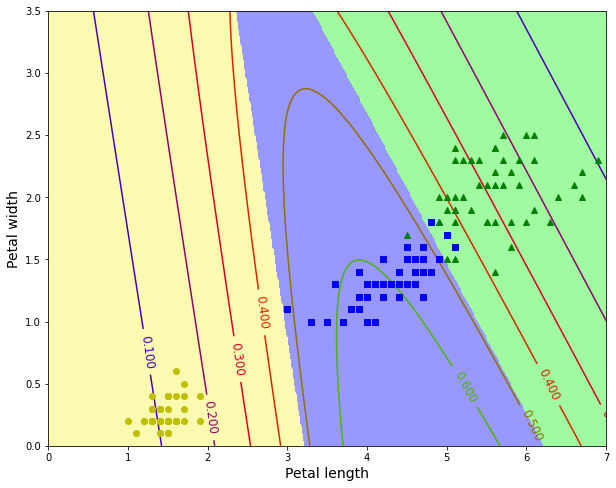

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)

# plt.legend(loc='upper left', fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

检查最终模型的

In [30]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333